Let's experiment on the [MovieLens 100K Dataset](https://grouplens.org/datasets/movielens/) while creating a Pandas tutorial at the same time! It includes 100,000 ratings from 1000 users on 1700 movies and was released in 1998. Find the zipfile [here](https://grouplens.org/datasets/movielens/100k/)

In [1]:
import pandas as pd
import zipfile
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path = Path('data/ml-100k')
with zipfile.ZipFile(str(path) + '.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
!ls {path}

README       u.genre      u.user       u2.test      u4.test      ua.test
allbut.pl    u.info       u1.base      u3.base      u5.base      ub.base
mku.sh       u.item       u1.test      u3.test      u5.test      ub.test
u.data       u.occupation u2.base      u4.base      ua.base


### Loading the DataFrames

In [4]:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv(path/'u.user', sep='|', names=user_cols,
                     encoding='latin-1')
user_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
rating_cols = ['user_id', 'movie_id', 'ratings', 'unix_timestamp']
rating_df = pd.read_csv(path/'u.data', sep='\t', names=rating_cols,
                       encoding='latin-1')
rating_df.head()

,user_id,movie_id,ratings,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
# Load only the first 5 columns
movie_df = pd.read_csv(path/'u.item', sep='|', names=movie_cols, 
                       usecols=range(5), encoding='latin-1')
movie_df.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


### Inspecting our DataFrames

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


After using the **info( )** method on the *movie_df* dataframe, we find out that the *video_release_date* column isn't populated at all and the columns *release_date* and *imdb_url* are missing few values.

If we are only interesting in getting the datatypes of the different columns, we can use the **dtypes** method.

In [8]:
movie_df.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

To get simple statistics for each numeric column in a DataFrame, we can use the **describe( )** method

In [9]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


From the result, we can easily spot that the average age of the users part of the study is a shade above 34 years old, with the minimum age being 7 and maximum being 73. 

### Selection

**Column based Selection:** Index the DataFrame with a list of necessary column(s) to make a selection. If you are trying to grab a single column (a Series), you don't need to use a list, just pass the name of the column instead.

In [10]:
user_df.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

In [11]:
cols_needed = ['age', 'occupation']
user_df[cols_needed].head()

,age,occupation
0,24,technician
1,53,other
2,23,writer
3,24,technician
4,33,other


**Row based Selection:**: This can be achieved by using an indice, sliced indexes or boolean masks

In [12]:
mask = user_df['age'] > 60
user_df[mask].head(3)

,user_id,age,sex,occupation,zip_code
105,106,61,M,retired,55125
210,211,66,M,salesman,32605
265,266,62,F,administrator,78756


In [13]:
mask = (user_df.sex == 'F') & (user_df.occupation == 'retired')
user_df[mask].head()

,user_id,age,sex,occupation,zip_code
859,860,70,F,retired,48322


In [14]:
# Index Slice
user_df[200:204]

,user_id,age,sex,occupation,zip_code
200,201,27,M,writer,E2A4H
201,202,41,F,educator,60201
202,203,25,F,student,32301
203,204,52,F,librarian,10960


**A note on Indexing:** As you may have noticed, Pandas adds a default numeric indice to each row of the dataframe, acting as an unique key. If we would like to change this to an existing column, we can just use the **set_index( )** method.

In [15]:
# set_index returns a new dataframe. To modify the existing dataframe, use inplace=True param
clean_user_df = user_df.set_index('user_id')
clean_user_df.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


We can use the convenient **iloc** method to grab the rows based on this new primary key.

In [16]:
print(clean_user_df.iloc[100])
print('\n')
print(clean_user_df.iloc[[1, 100, 200]])

age                15
sex                 M
occupation    student
zip_code        05146
Name: 101, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
101       15   M    student    05146
201       27   M     writer    E2A4H


As you can see, **iloc** is giving you the rows at particular positions in the index. If instead, you want to get the rows based on the label/value of the index, use the **loc** method. See if you can spot the difference.

In [17]:
print(clean_user_df.loc[100])
print('\n')
print(clean_user_df.loc[[1, 100, 200]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
100       36   M   executive    90254
200       40   M  programmer    93402


### Joining and Merging

Quite often, we will need to combine two DataFrames that are related to each other. Pandas **merge** function can achieve this with incredible ease and flexibility. Check its [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) for details. The parameter *how* can take the values {'left', 'right', 'outer', 'inner'}. Here's what they mean: 

1. left: use only keys from left frame (SQL: left outer join)
2. right: use only keys from right frame (SQL: right outer join)
3. outer: use union of keys from both frames (SQL: full outer join)
4. inner: use intersection of keys from both frames (SQL: inner join - Default value!)

In [18]:
# Merge the 3 individual DataFrames into a master DataFrame containing all their features!
# The default type of join is an 'inner' join, based on intersection of the common columns
movie_ratings = pd.merge(movie_df, rating_df)
master = pd.merge(movie_ratings, user_df)
master.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,ratings,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


### Groupby: Split-Apply-Combine

Groupby is my favorite pandas method and allows you to transform your data into views that can help solve your fundamental questions regarding it and give you valuable insights. As is common in most data analytics problems, we break the dataframe into manaegable pieces, perform operation on each of those pieces, and later recombine the pieces. Here is the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) for the same.

In [19]:
# Returns a groupby object and tells us the memory address of it.
master.groupby('sex')

In [20]:
# Now let's view a feature like ratings from this gender-based view. A series is returned
master.groupby('sex')['ratings'].size()

sex
F    25740
M    74260
Name: ratings, dtype: int64

In [21]:
# We can make this more presentable!
master.groupby('sex')['ratings'].size().rename('total_ratings').reset_index()

,sex,total_ratings
0,F,25740
1,M,74260


In [22]:
# Can we find out if females user rate their movies higher or lower than their male counterparts?
master.groupby('sex')['ratings'].mean().rename('mean_ratings').reset_index()

,sex,mean_ratings
0,F,3.531507
1,M,3.529289


No, they've rated their moves simalry! I'm sure you can now see how useful groupby method can be.

### Let the Experiments begin!

In [23]:
# Before we begin let's revise what the master dataframe contains
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
user_id               100000 non-null int64
ratings               100000 non-null int64
unix_timestamp        100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_code              100000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


The **video_release_date** column is entirely empty. We can get rid of it using the pandas **drop( )** method. We have to mention the fact that we are dropping a column, this is done with the *axis* argument (0f for rows, 1 for columns)

In [24]:
master.drop('video_release_date', axis=1, inplace=True)

Let's convert the **release_date** column into a pandas DateTime object. This will give a list of additional methods to apply on this column. Notice I've used a *dataframe.column_name* apprach to access the column name instead of the usual *dataframe['column_name']*

In [25]:
print(f'The previus data type was: {master.release_date.dtype}')

master.release_date = pd.to_datetime(master.release_date)

print(f'The new data type is: {master.release_date.dtype}')

The previus data type was: object
The new data type is: datetime64[ns]


### Exploratory Data Analysis

Let's do some basic EDA and analyze few columns to see the breadth of information we have.

#### Release Date Analysis

In [26]:
# Month of Release
month_df = master.release_date.dt.month.value_counts().reset_index()
month_df.columns = ['month', 'number_released']
month_df.head()

,month,number_released
0,1.0,70521
1,3.0,3847
2,2.0,3797
3,12.0,3197
4,4.0,2706


In [27]:
# Let's present this data in a visually appealing way.
import matplotlib
matplotlib.style.use('ggplot')

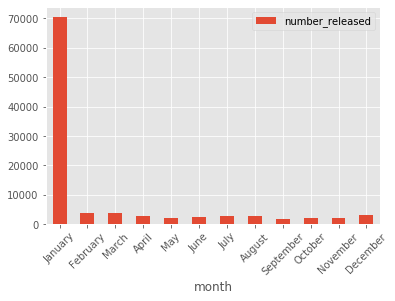

In [28]:
month_df.sort_values(by='month', inplace=True)
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
             5: 'May', 6: 'June', 7: 'July', 8: 'August',
             9: 'September', 10: 'October', 11: 'November',
             12: 'December'}
month_df['month'] = month_df['month'].map(month_dict)
month_df.plot(kind='bar', x='month', y='number_released', rot=45, figsize=(6, 4))
plt.show()

Let's do the same with the year values and see if we can understand the observations in our data better

In [29]:
# Year of Release
year_df = master.release_date.dt.year.value_counts().reset_index()
year_df.columns = ['year', 'number_released']
# Cast 'floats' in year column as ints
year_df['year'] = year_df['year'].astype(int)
year_df.head()

,year,number_released
0,1996,19708
1,1997,17393
2,1995,10499
3,1994,8893
4,1993,6657


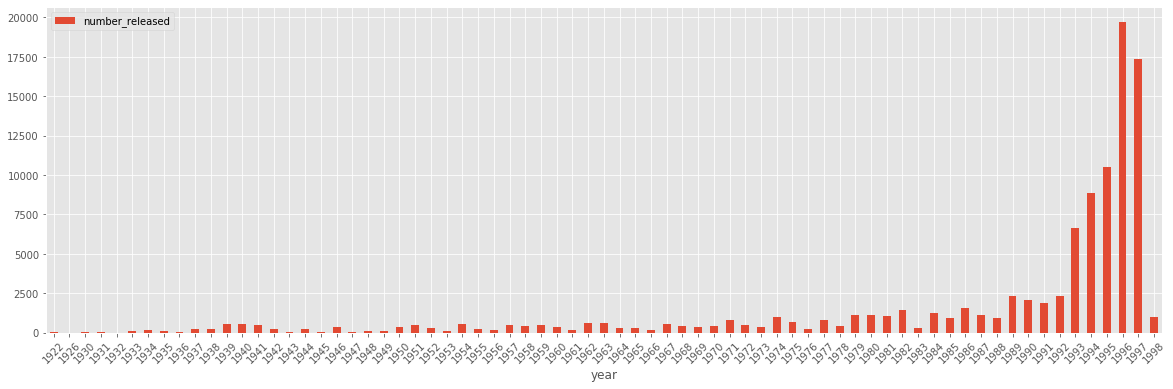

In [30]:
# Plot them in ascending order
year_df.sort_values(by='year', inplace=True)
year_df.plot(kind='bar', x='year', y='number_released', rot=45, figsize=(20,6))
plt.show()